<a href="https://colab.research.google.com/github/roghayefazli/mnist-mlp-finetuning/blob/main/MNIST_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

رقیه فضلی     403147103

In [ ]:
pip install tensorlayer

MLP on MNIST

In [ ]:
import tensorflow as tf
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0

# Split
X_train, X_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Build model (equivalent to your TensorLayer model)
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.2, input_shape=(784,)),   # keep=0.8 → dropout=0.2
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)  # logits (no activation)
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
print("Training model ...")
model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=1
)

# Test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n🔍  final test accuracy : {test_acc:.4f}")

# Save
model.save('mnist_mlp_keras.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model ...
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.4808 - loss: 1.5930 - val_accuracy: 0.8995 - val_loss: 0.3490
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8375 - loss: 0.5246 - val_accuracy: 0.9248 - val_loss: 0.2575
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.8758 - loss: 0.4141 - val_accuracy: 0.9371 - val_loss: 0.2183
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.8953 - loss: 0.3450 - val_accuracy: 0.9472 - val_loss: 0.1888
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9081 - loss: 0.3017 - val_accuracy: 0.9528 - val_loss: 0.1685
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9156 - loss: 0.2771 - val_accuracy: 0.9563 - val_loss: 0.1526
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9249 - loss: 0.2492 - val_accuracy: 0.9594 - val_loss: 0.1412
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.930


🔍  final test accuracy : 0.9748


load model and prediction

🖼️ Loading trained model...
✅ Model loaded successfully.


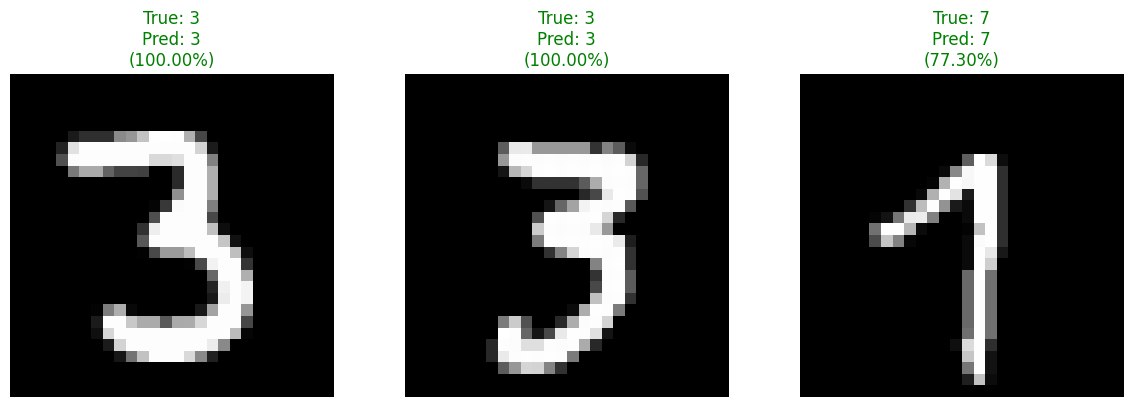

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# --- 1. Load the trained model ---
model_path = 'mnist_mlp_keras.h5'
print("🖼️ Loading trained model...")
try:
    model = tf.keras.models.load_model(model_path)
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Failed to load model: {e}")
    exit()

# --- 2. Load and prepare data ---
(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test.astype(np.float32) / 255.0  # Normalize to [0,1]

# Number of samples to show
num_samples = 3
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

# Preprocess selected images
images = x_test[sample_indices]
true_labels = y_test[sample_indices]
input_batch = images.reshape(num_samples, -1)  # Shape: (3, 784)

# --- 3. Predict all at once ---
logits = model.predict(input_batch, verbose=0)
probabilities = tf.nn.softmax(logits).numpy()
predicted_labels = np.argmax(probabilities, axis=1)
confidences = probabilities[np.arange(num_samples), predicted_labels]

# --- 4. Display all images side by side ---
fig, axes = plt.subplots(1, num_samples, figsize=(4 * num_samples, 4))
if num_samples == 1:
    axes = [axes]  # Ensure axes is iterable

for i in range(num_samples):
    axes[i].imshow(images[i], cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    axes[i].set_title(
        f"True: {true_labels[i]}\nPred: {predicted_labels[i]}\n({confidences[i]:.2%})",
        color=color,
        fontsize=12
    )
    axes[i].axis('off')

plt.tight_layout()
plt.show()

customize model (3 dense layers)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Training model ...
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.4414 - loss: 1.6702 - val_accuracy: 0.9065 - val_loss: 0.3296
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.8473 - loss: 0.4918 - val_accuracy: 0.9323 - val_loss: 0.2302
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.8938 - loss: 0.3505 - val_accuracy: 0.9469 - val_loss: 0.1829
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9144 - loss: 0.2774 - val_accuracy: 0.9553 - val_loss: 0.1561
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9282 - loss: 0.2380 - val_accuracy: 0.9590 - val_loss: 0.1406
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.9379 - loss: 0.2059 - val_accuracy: 0.9634 - val_loss: 0.1261
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.9467 - loss: 0.1778 - val_accuracy: 0.9666 - val_loss: 0.1149
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.

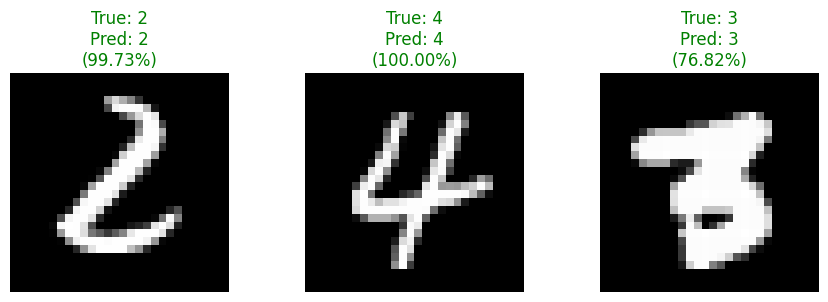

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# === 1. Load and preprocess data ===
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0

# Split train → train + val
X_train, X_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# === 2. Build model (with 3 Dense layers ) ===
model = tf.keras.Sequential([
    tf.keras.layers.Dense(800, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(800, activation='relu'),  # third layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)  # logits
])

# === 3. Compile ===
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# === 4. Train ===
print(" Training model ...")
model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=1
)

# === 5. Save full model  ===
model.save('mnist_mlp_keras.h5')
# print("✅   model saved : mnist_mlp_keras.h5")

# === 6.  Show 3 predictions side by side ===
_, (test_images, test_labels) = mnist.load_data()
test_images = test_images.astype(np.float32) / 255.0

# Pick 3 random samples
indices = np.random.choice(len(test_images), 3, replace=False)
samples = test_images[indices]
true_labels = test_labels[indices]

# Predict
inputs = samples.reshape(3, -1)
logits = model.predict(inputs, verbose=0)
preds = tf.nn.softmax(logits).numpy()
predicted_labels = np.argmax(preds, axis=1)
confidences = preds[np.arange(3), predicted_labels]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for i in range(3):
    axes[i].imshow(samples[i], cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    axes[i].set_title(
        f"True: {true_labels[i]}\nPred: {predicted_labels[i]}\n({confidences[i]:.2%})",
        color=color
    )
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Transfer Learning: Feature Extraction

Use MNIST on Fashion_MNIST

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as tl
from tensorflow.keras.datasets import fashion_mnist

# Define constants (MUST match the trained model)
input_shape = (784,)
num_classes_old = 10  # MNIST (0-9)
num_classes_new = 10  # Fashion MNIST (10 categories)
# FIX: Change the weights file name to match the file saved by the training script.
weights_file = 'model.weights.h5'

# --- 1. Load and Preprocess the New Dataset (Fashion MNIST) ---
print("🖼️ Step 1: Loading and preprocessing Fashion MNIST data...")
# Fashion MNIST is a common dataset of clothing articles, similar in shape to MNIST.
(X_train_new, y_train_new), (X_test_new, y_test_new) = fashion_mnist.load_data()

# Preprocess the data just like MNIST: normalize and flatten
X_train_new = X_train_new.reshape(-1, 784).astype('float32') / 255.0
X_test_new = X_test_new.reshape(-1, 784).astype('float32') / 255.0


# --- 2. Rebuild the Base MLP Model ---
print("🛠️ Step 2: Rebuilding base MLP structure and loading weights...")

# Rebuild the exact same hidden layer structure
inputs = tl.Input(shape=input_shape)
nn = tl.Dense(units=800, activation='relu', name='dense_1')(inputs)
nn = tl.Dropout(0.5)(nn)
nn = tl.Dense(units=800, activation='relu', name='dense_2')(nn)
nn = tl.Dropout(0.5)(nn)
nn = tl.Dense(units=800, activation='relu', name='dense_3')(nn)
nn = tl.Dropout(0.5)(nn)

# The base model outputs the features from the last hidden layer
base_model = tf.keras.Model(inputs=inputs, outputs=nn, name="base_mlp")


# --- 3. Load Weights and Freeze the Base Layers ---
print("🥶 Step 3: Loading weights and freezing the base layers...")

try:
    # Load the weights trained on MNIST into the hidden layers (using the corrected filename)
    base_model.load_weights(weights_file, by_name=True, skip_mismatch=True)
    print(f"Successfully loaded weights from '{weights_file}'.")
except Exception as e:
    print(f"ERROR: Could not load weights from '{weights_file}'. Please ensure the file exists.")
    print(f"Details: {e}")
    exit()

# Freeze all layers in the base model (this is Feature Extraction)
for layer in base_model.layers:
    layer.trainable = False


# --- 4. Build the New Classification Head ---
print("🧠 Step 4: Building the new classification head...")

# Take the output from the frozen base model
x = base_model.output

# Add a NEW output layer suitable for the new task (Fashion MNIST)
output_transfer = tl.Dense(units=num_classes_new, name='new_output')(x)

# Create the final transfer model
transfer_model = tf.keras.Model(inputs=base_model.input, outputs=output_transfer)


# --- 5. Compile and Train the Transfer Model ---
print("⏳ Step 5: Compiling and training the new model...")
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['sparse_categorical_accuracy']
)

# Train the new model (only the new output layer will learn)
transfer_model.fit(
    X_train_new, y_train_new,
    epochs=5,  # Fewer epochs are often needed for transfer learning
    batch_size=256,
    validation_data=(X_test_new, y_test_new)
)

print("\n✅ Transfer learning complete! Only the new output layer was trained.")

🖼️ Step 1: Loading and preprocessing Fashion MNIST data...
🛠️ Step 2: Rebuilding base MLP structure and loading weights...
🥶 Step 3: Loading weights and freezing the base layers...
ERROR: Could not load weights from 'model.weights.h5'. Please ensure the file exists.
Details: Invalid keyword arguments: {'by_name': True}
🧠 Step 4: Building the new classification head...
⏳ Step 5: Compiling and training the new model...
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 2.1361 - sparse_categorical_accuracy: 0.2237 - val_loss: 1.4489 - val_sparse_categorical_accuracy: 0.6389
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 1.6044 - sparse_categorical_accuracy: 0.4424 - val_loss: 1.2378 - val_sparse_categorical_accuracy: 0.6656
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 1.4769 - sparse_categorical_accuracy: 0.4838 - val_loss: 1.1558 - val_sparse_categorical_accuracy: 0.6717
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 1.4343 - sparse_ca

fine Tuning

📥 Loading pre-trained MNIST model from 'mnist_mlp_keras.h5'...


✅ Model loaded successfully.
🛠️ Rebuilding base feature extractor from loaded model...
✅ Base feature extractor rebuilt and weights loaded.
🖼️ Loading Fashion-MNIST data...

--- PHASE 1: Feature Extraction ---
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 1.6989 - sparse_categorical_accuracy: 0.4120 - val_loss: 1.0334 - val_sparse_categorical_accuracy: 0.6906
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 1.0905 - sparse_categorical_accuracy: 0.6316 - val_loss: 0.8934 - val_sparse_categorical_accuracy: 0.7096
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9990 - sparse_categorical_accuracy: 0.6501 - val_loss: 0.8304 - val_sparse_categorical_accuracy: 0.7297
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.9671 - sparse_categorical_accuracy: 0.6575 - val_loss: 0.8076 - val_sparse_categorical_accuracy: 0.7299
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.9269 - sparse_categorical_accuracy: 0.6680 - val_loss: 0.7779 -

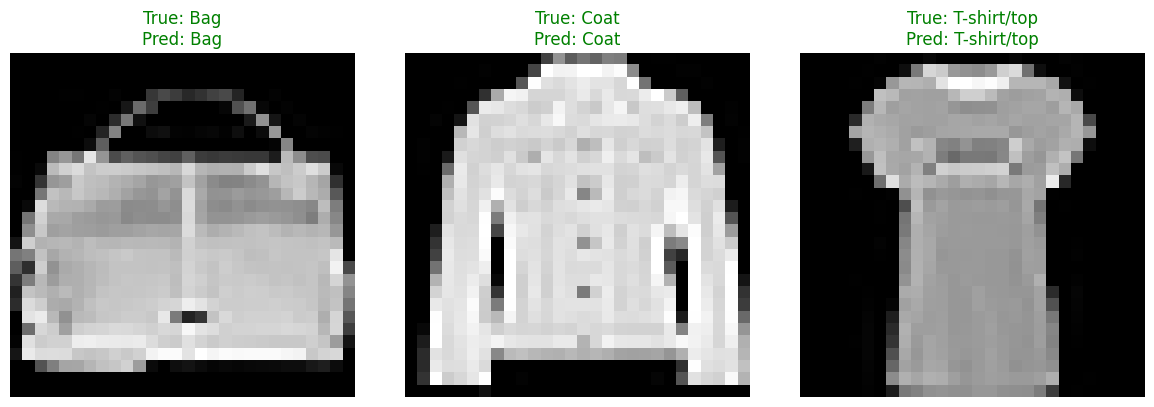

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# ================================
# 1. Load pre-trained MNIST model
# ================================
print("📥 Loading pre-trained MNIST model from 'mnist_mlp_keras.h5'...")
try:
    full_mnist_model = tf.keras.models.load_model('mnist_mlp_keras.h5')
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Failed to load model: {e}")
    exit()

# ================================
# 2. Rebuild the base (without last layer) manually
# ================================
#  assume the MNIST model is: [Dropout, Dense(800), Dropout, Dense(800), Dropout, Dense(10)]
# So  rebuild the same, but stop before the last Dense(10)

print("🛠️ Rebuilding base feature extractor from loaded model...")

# Get weights from the loaded model
weights_list = full_mnist_model.get_weights()

# Count weights per layer: each Dense has [kernel, bias], each Dropout has none
# Typical structure:
#   Dropout(0.2) -> 0 weights
#   Dense(800)   -> 2 weights (kernel, bias)
#   Dropout(0.5) -> 0
#   Dense(800)   -> 2
#   Dropout(0.5) -> 0
#   Dense(10)    -> 2  <--  skip this

# Rebuild base model (up to last hidden layer)
base_input = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dropout(0.2)(base_input)  # if your model has initial dropout
x = tf.keras.layers.Dense(800, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(800, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
# Stop here — this is the last hidden layer

base_model = tf.keras.Model(inputs=base_input, outputs=x)

# Load weights into the base model (only up to the last hidden layer)
# Total weights used in base: first 4 weight tensors (2 for each Dense)
base_model.set_weights(weights_list[:4])  # Adjust if your structure differs
print("✅ Base feature extractor rebuilt and weights loaded.")

# ================================
# 3. Load Fashion-MNIST
# ================================
print("🖼️ Loading Fashion-MNIST data...")
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# ================================
# 4. Add new head & do transfer learning
# ================================
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
new_output = tf.keras.layers.Dense(10, name='fashion_head')(x)
transfer_model = tf.keras.Model(inputs=base_model.input, outputs=new_output)

# Phase 1: Feature extraction
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['sparse_categorical_accuracy']
)
print("\n--- PHASE 1: Feature Extraction ---")
transfer_model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test), verbose=1)

# Phase 2: Fine-tuning
for layer in transfer_model.layers:
    layer.trainable = True

transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['sparse_categorical_accuracy']
)
print("\n--- PHASE 2: Fine-Tuning ---")
transfer_model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test), verbose=1)

# ================================
# 5. Evaluate & Visualize
# ================================
test_loss, test_acc = transfer_model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Final Test Accuracy: {test_acc:.4f}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

indices = np.random.choice(len(X_test), 3, replace=False)
samples = X_test[indices]
true_labels = y_test[indices]
logits = transfer_model.predict(samples, verbose=0)
preds = tf.nn.softmax(logits).numpy()
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(samples[i].reshape(28,28), cmap='gray')
    true_name = class_names[true_labels[i]]
    pred_name = class_names[pred_labels[i]]
    color = 'green' if true_labels[i] == pred_labels[i] else 'red'
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()